In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
df = pd.read_csv('yahoo_stock.csv')  # Replace with the path to your dataset

In [3]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [8]:
# Select the 'Close' prices as the target variable
y = df['Close']

In [9]:
# Split the data into training and testing sets
train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]

In [10]:
# Build an ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
# Make predictions on the test set
y_pred = model_fit.forecast(steps=len(test))

In [12]:
# Evaluate the model
mae = mean_absolute_error(test, y_pred)
mse = mean_squared_error(test, y_pred)
rmse = np.sqrt(mse)

In [13]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 228.10
Mean Squared Error: 77620.69
Root Mean Squared Error: 278.60


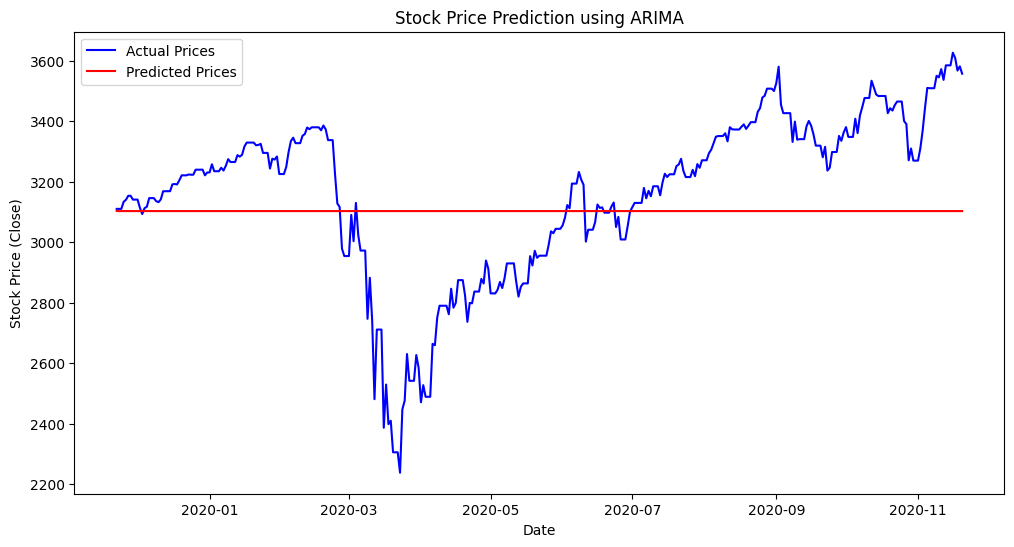

In [14]:
# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (Close)')
plt.legend()
plt.title('Stock Price Prediction using ARIMA')
plt.show()